In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

import warnings
warnings.filterwarnings('ignore')

# Підвищимо розмір графіків за замовчуванням
# plt.style.use('ggplot')
%config InlineBackend.figure_format = 'svg'
# plt.rcParams['figure.figsize'] = 7, 5
# plt.rcParams['axes.grid'] = True


In [2]:
# Initialize variables
DATASET_NAME = 'fer'
PALETTE_BARPLOT = 'Greens'
PALETTE_HEATMAP = 'Greens'

# Define emotion classes
EMOTIONS = ['Злість', 'Страх', 'Радість', 'Нейтр.', 'Сум']
# EMOTIONS = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

# Define used metrics
METRICS = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
# METRICS = ['Precision', 'Recall', 'F1-Score', 'Accuracy', 'FPR', 'FNR']

# Sheet names
SHEET_NAMES = ['Sheet1', 'Sheet2', 'Sheet3', 'Sheet4', 'Sheet5']
# SHEET_NAMES = ['Sheet1', 'Sheet2', 'Sheet3']

# Dictionary to hold arrays
input_matrices = {}

# Read each sheet and convert to numpy array
for i, sheet in enumerate(SHEET_NAMES, start=1):
    df = pd.read_excel(f'{DATASET_NAME}_experiments.xlsx', sheet_name=sheet)
    # df = pd.read_excel(f'test_experiments.xlsx', sheet_name=sheet)
    input_matrices[f'Модель_{i}'] = df.to_numpy()

# Access the numpy array for a specific matrix
# print(input_matrices)


In [3]:
# # Dataframe to hold the results
# df_results = pd.DataFrame()

# # Iterate over each confusion matrix
# for matrix_name, matrix_values in input_matrices.items():

#     # Calculate accuracy
#     accuracy = np.trace(matrix_values) / np.sum(matrix_values)

#     # Flatten the matrix for sklearn metrics
#     y_true = np.repeat(np.arange(matrix_values.shape[0]), np.sum(matrix_values, axis=1))
#     y_pred = np.repeat(np.arange(matrix_values.shape[0]), np.sum(matrix_values, axis=0))

#     # Calculate precision, recall and f1-score independently for each class
#     precision = precision_score(y_true, y_pred, average=None)
#     recall = recall_score(y_true, y_pred, average=None)
#     f_score = f1_score(y_true, y_pred, average=None)

#     # Create a dataframe from the metrics
#     df = pd.DataFrame({
#         'Emotion': EMOTIONS,
#         'Precision': precision,
#         'Recall': recall,
#         'F1-Score': f_score,
#     })

#     # Add accuracy column (same value for each class)
#     df['Accuracy'] = accuracy

#     # Add matrix name column
#     df['Model'] = matrix_name

#     # Append this dataframe to the results dataframe
#     df_results = df_results.append(df, ignore_index=True)

# # Set the Matrix and Emotion columns as the index
# # df_results.set_index(['Matrix', 'Emotion', 'Precision', 'Recall', 'F1-Score', 'Accuracy'], inplace=True)

# # Save the DataFrame to an Excel file
# # df_results.to_excel(f'{DATASET_NAME}_results.xlsx')

# # Save the DataFrame to a csv file
# # df_results.to_csv(f'{DATASET_NAME}_results.csv')

# # Print the dataframe
# df_results


In [4]:
# Initiate an empty dataframe
df_results1 = pd.DataFrame()

# Iterate over each confusion matrix
for matrix_name1, matrix_values1 in input_matrices.items():
    # Get true positives
    TP = np.diag(matrix_values1)
    
    # Get false positives, false negatives and true negatives
    FP = np.sum(matrix_values1, axis=0) - TP
    FN = np.sum(matrix_values1, axis=1) - TP
    TN = np.sum(matrix_values1) - (FP + FN + TP)
    
    # Calculate metrics
    accuracy1 = np.sum(TP) / np.sum(matrix_values1)
    precision1 = TP / (TP + FP)
    recall1 = TP / (TP + FN)
    fscore1 = 2 * precision1 * recall1 / (precision1 + recall1)
    FPR1 = FP / (FP + TN)
    FNR1 = FN / (TP + FN)

    # Convert metrics to a temporary dataframe
    temp_df = pd.DataFrame({
        'Emotion': EMOTIONS,
        'Precision': precision1,
        'Recall': recall1,
        'F1-Score': fscore1,
        'Accuracy': accuracy1,
        'FPR': FPR1,
        'FNR': FNR1,
        'Model': f'{matrix_name1}',
    })

    # Append the temporary dataframe to df_results
    df_results1 = df_results1.append(temp_df, ignore_index=True)

df_results1

,Emotion,Precision,Recall,F1-Score,Accuracy,FPR,FNR,Model
0,Злість,0.812564,0.823591,0.818040,0.791533,0.034483,0.176409,Модель_1
1,Страх,0.753968,0.742188,0.748031,0.791533,0.047583,0.257812,Модель_1
2,Радість,0.872694,0.799887,0.834706,0.791533,0.046392,0.200113,Модель_1
3,Нейтр.,0.741788,0.787510,0.763965,0.791533,0.067559,0.212490,Модель_1
4,Сум,0.754160,0.799519,0.776178,0.791533,0.065143,0.200481,Модель_1
5,Злість,0.713035,0.765136,0.738167,0.773252,0.055892,0.234864,Модель_2
6,Страх,0.750947,0.774414,0.762500,0.773252,0.050460,0.225586,Модель_2
7,Радість,0.889154,0.841037,0.864426,0.773252,0.041685,0.158963,Модель_2
8,Нейтр.,0.724626,0.706407,0.715400,0.773252,0.066160,0.293593,Модель_2
9,Сум,0.733491,0.748196,0.740770,0.773252,0.067949,0.251804,Модель_2


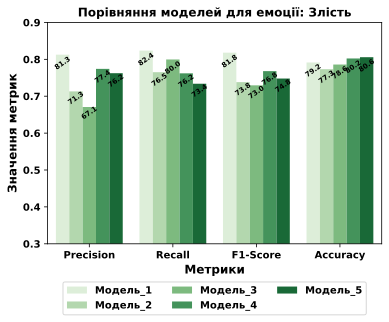

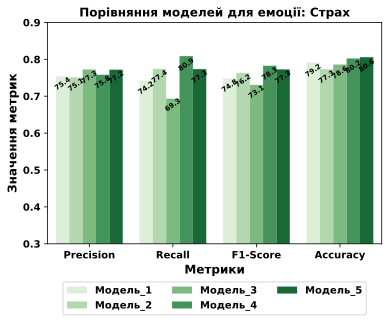

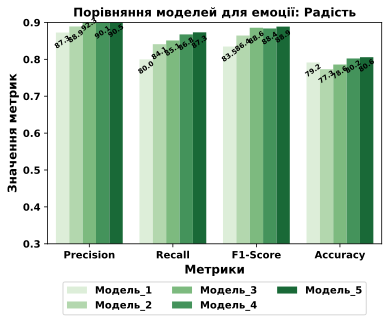

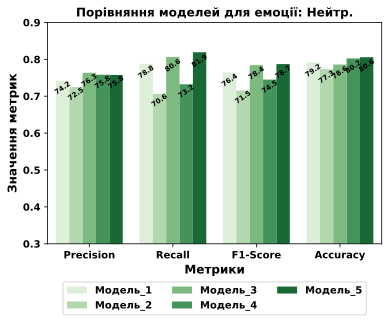

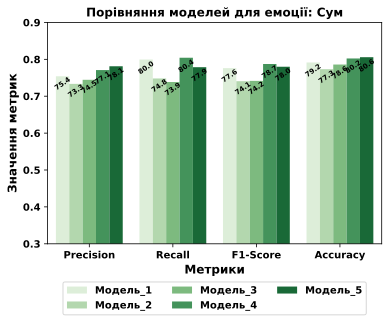

In [7]:
# Get unique emotions
emotions = df_results1['Emotion'].unique()

# loop over each emotion
for emotion in emotions:
    # Filter rows for the current emotion
    df_emotion = df_results1[df_results1['Emotion'] == emotion]

    # Melt the DataFrame to long format for easy plotting with seaborn
    # emotion_data_melt = pd.melt(emotion_data, id_vars=['Matrix', 'Emotion'],
    #                             value_vars=['Precision', 'Recall', 'F1-Score', 'Accuracy'])
    
    df_emotion_melted = df_emotion.melt(id_vars='Model', value_vars=METRICS, 
                                        var_name='Metric', value_name='Value')
    
    # Plot the data
    plt.figure(figsize=(6,4), dpi=600)
    plt.rcParams.update({
        'font.size': 10,
        'font.weight': 'bold'})
    
    # Plot the barplot 
    barplot = sns.barplot(x='Metric', y='Value', hue='Model', ci=None, 
                          data=df_emotion_melted, 
                          palette=PALETTE_BARPLOT)

    # Add title and labels
    plt.title(f'Порівняння моделей для емоції: {emotion}', fontweight='bold', fontsize=12)
    plt.ylabel('Значення метрик', fontweight='bold', fontsize=12)
    plt.xlabel('Метрики', fontweight='bold', fontsize=12)

    # Move the legend to an empty part of the plot
    plt.legend(bbox_to_anchor=(0.5, -0.15), loc='upper center', 
               ncol=3, fontsize=10)
    
    # Plot data labels
    for p in barplot.patches:
        height = p.get_height()
        barplot.text(x = p.get_x()+(p.get_width()/2),
                     y = height*0.95,
                     s = '{:.1f}'.format(height*100),
                     ha = 'center',
                     rotation=35, 
                     fontsize=7)
    
    # Check if the folder exists
    if not os.path.exists(f'{DATASET_NAME}_barplots'):
        os.makedirs(f'{DATASET_NAME}_barplots')
    
    # Save the plot
    # plt.savefig(f'{DATASET_NAME}_barplots/{DATASET_NAME}_bp_{emotion}.svg', 
    #             format='svg', bbox_inches='tight')
    
    # Set the limits of y-axis
    plt.ylim(0.3, 0.9)
    
    # Show the plot
    plt.show()


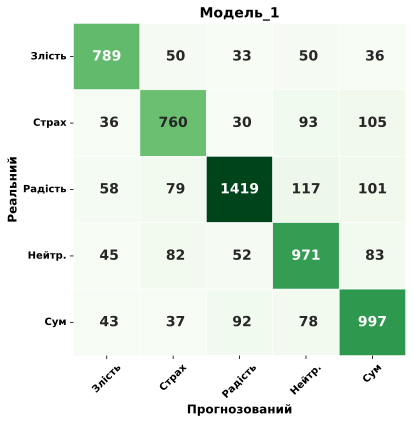

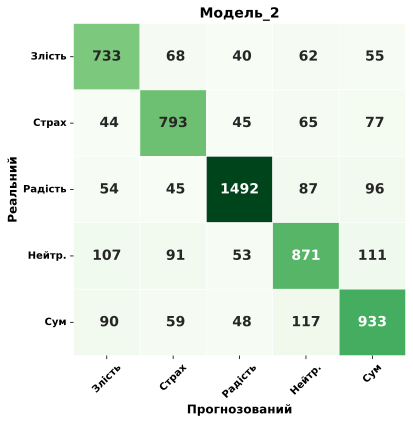

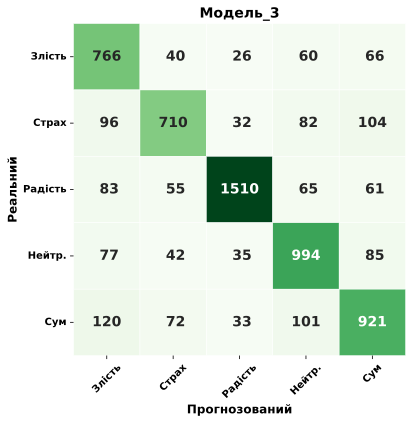

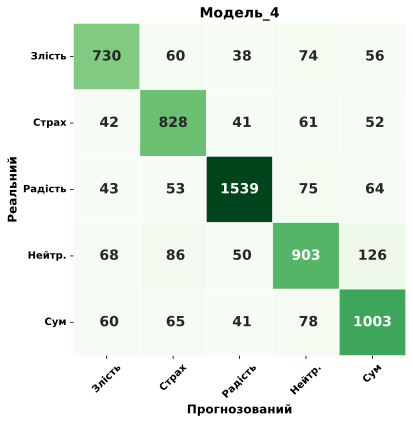

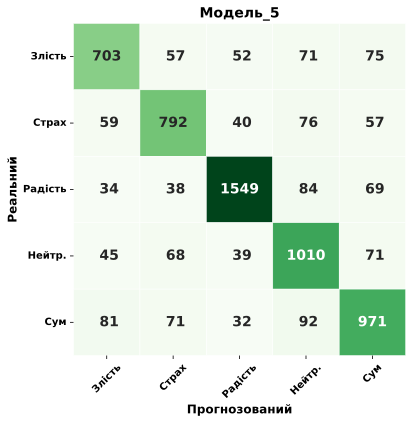

In [6]:
# Loop over each matrix and plot it
for matrix_name, matrix in input_matrices.items():
    plt.figure(figsize=(6,6), dpi=600)
    
    sns.heatmap(matrix, cmap=PALETTE_HEATMAP, annot=True, xticklabels=EMOTIONS, 
                yticklabels=EMOTIONS, annot_kws={"size": 14, "weight": "bold"}, 
                fmt='3g', square=True, linewidths=0.5, cbar=False)

    # plt.tick_params(axis='x', labelsize=12) # x font label size
    # plt.tick_params(axis='y', labelsize=12) # y font label size

    plt.yticks(fontweight='bold', fontsize=10, rotation=0)
    plt.xticks(fontweight='bold', fontsize=10, rotation=45)

    plt.title(matrix_name, fontweight='bold', fontsize=14)
    plt.ylabel('Реальний', fontweight='bold', fontsize=12)
    plt.xlabel('Прогнозований', fontweight='bold', fontsize=12)
        
    if not os.path.exists(f'{DATASET_NAME}_heatmaps'):
        os.makedirs(f'{DATASET_NAME}_heatmaps')


    # Save the plot
    # plt.savefig(f'heatmaps/heatmap_{matrix_name}.png', dpi=600, bbox_inches='tight')
    # plt.savefig(f'{DATASET_NAME}_heatmaps/{DATASET_NAME}_hm_{matrix_name}.svg', 
    #             format='svg', bbox_inches='tight')
    
    # Show the plot
    plt.show()
